In [3]:
import gensim

# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('./model/GoogleNews-vectors-negative300.bin', binary=True)  

In [65]:
import os
import collections

songs = collections.defaultdict(set)
song_names = dict()
for f in sorted(os.listdir('songs')):
    if f[0] == '.':
        continue
    
    for i, l in enumerate(open('songs/' + f, 'r').readlines()):
        if i == 0:
            song_names[f.split(".")[0]] = l.strip()
        # Ignore song name
        if i < 2:
            continue
        
        arr = l.strip().split(" ")
        
        for a in arr:
            if a == '':
                continue
            if a not in model.vocab:
                continue
            songs[f.split(".")[0]].add(a)

print(songs)
song_years = sorted(list(songs.keys()))
song_years

defaultdict(<class 'set'>, {'1962': {'Come', 'you', 'island', 'sets', 'Sunny', 'the', 'our', 'for', 'join', 'oh', 'bloom', 'merry', 'Join', 'along', 'Pretty', 'song', 'in', 'Blend', 'flowers'}, '1967': {"you'll", 'Quay', 'sunrise', 'turning', 'us', 'unforgettable', 'light', 'striving', 'other', 'you', 'happiness', 'take', 'around', 'In', 'Because', 'hundred', 'Raffles', 'the', 'bus', 'buildings', 'for', 'into', 'Collyer', 'For', 'people', 'Place', 'an', "You'll", "there's", 'way', 'could', 'Esplanade', 'everyone', 'are', 'Singapore', 'on', 'sky', 'And', 'I', 'all', 'big', 'find', 'climbing', 'see', "it's", 'trip', 'You', 'in', 'faraway', "Let's", 'like', 'sight', 'city', 'town', 'who', 'little', 'hearts', 'To', 'Their', 'The', 'go', 'wide', 'down', 'darkness'}, '1969': {'white', 'truth', 'new', 'love', 'blood', 'happy', 'the', 'lamp', 'out', 'guide', 'our', 'yet', 'for', 'we', 'Each', 'as', 'stormy', 'moon', 'five', 'Youthful', 'are', 'free', 'tranquil', 'all', 'flag', 'is', 'pure', 's

['1962',
 '1967',
 '1969',
 '1984',
 '1986',
 '1987',
 '1990',
 '1991',
 '1997',
 '1999',
 '1999-2',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2007-2',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2015',
 '2016',
 '2017']

In [116]:
import numpy as np
import copy

centroids = np.zeros((len(song_years), 300))

for i in range(len(song_years)):
    l = list(songs[song_years[i]])
    centroids[i] = copy.copy(model[l[0]])
    
    for w in range(1, len(l)):
        centroids[i] += model[l[w]]
    
    centroids[i] /= len(l)

In [117]:
dist = np.zeros((len(songs.keys()), len(songs.keys())))

In [118]:
for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
        dist[i, j] = np.linalg.norm(centroids[i] - centroids[j])

In [119]:
dist

array([[0.        , 0.76210682, 0.80615586, 0.77311079, 0.85615968,
        0.85412788, 0.81661097, 0.81463097, 0.81913686, 0.77116689,
        0.83623545, 0.80386098, 0.73586541, 0.82189191, 0.78661849,
        0.80779135, 0.82620195, 0.84721065, 0.74535006, 0.71985116,
        0.77473069, 0.78996276, 0.82570055, 0.82730643, 0.73669154,
        0.76258229, 0.83679798, 0.6983311 , 0.76152733],
       [0.76210682, 0.        , 0.53030509, 0.51034289, 0.4923526 ,
        0.48656663, 0.43964593, 0.50076211, 0.45225913, 0.44631732,
        0.50157783, 0.44089934, 0.35729797, 0.46270388, 0.49535204,
        0.38946317, 0.43753545, 0.55607284, 0.41842588, 0.43023312,
        0.43068163, 0.40391503, 0.43853906, 0.45247265, 0.43057345,
        0.43940481, 0.4323332 , 0.41300473, 0.48252604],
       [0.80615586, 0.53030509, 0.        , 0.62351021, 0.59520261,
        0.55816038, 0.53809353, 0.59543631, 0.52732393, 0.52257827,
        0.54703527, 0.48663997, 0.47002208, 0.56706566, 0.5098998 ,
  

In [120]:
out = open('dist.txt', 'w')
for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
        out.write(str(dist[i, j]).ljust(20) + ' ')
    out.write('\n')
out.close()

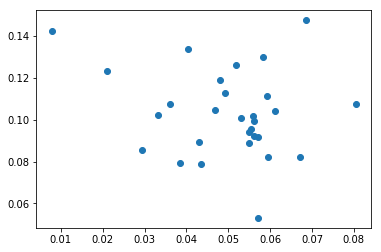

In [121]:
import matplotlib.pyplot as plt

plt.plot(centroids[:,2], centroids[:,3], 'o')
plt.show()

In [122]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(centroids)
labels = gmm.predict(centroids)

In [123]:
for s, l in sorted(zip(song_years, labels), key = lambda x: x[1]):
    print(s.ljust(8), song_names[s].ljust(50),l)

2006     My Island Home                                     0
1987     We Are Singapore                                   1
1997     Future In My Dreams                                1
2005     Reach Out For The Skies                            1
2009     What Do You See?                                   1
2010     Song for Singapore                                 1
2011     In A Heartbeat                                     1
2015     Our Singapore                                      1
1969     Five Stars Arising                                 2
1990     One People, One Nation, One Singapore              2
1999     Moments of Magic                                   2
1999-2   Together                                           2
2000     Shine On Me                                        2
2003     One United People                                  2
2007-2   Will You                                           2
2012     Love At First Light                                2
2017    

In [124]:
from joblib import dump, load
#dump(gmm, 'gmm-5cluster-best.joblib')

In [127]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(centroids)
kmeans.labels_

array([1, 3, 2, 4, 4, 0, 0, 4, 2, 0, 0, 0, 4, 4, 0, 4, 2, 4, 3, 4, 4, 2,
       2, 0, 4, 4, 2, 4, 0], dtype=int32)

In [128]:
for s, l in sorted(zip(song_years, kmeans.labels_), key = lambda x: x[1]):
    print(s.ljust(8), song_names[s].ljust(50),l)

1987     We Are Singapore                                   0
1990     One People, One Nation, One Singapore              0
1999     Moments of Magic                                   0
1999-2   Together                                           0
2000     Shine On Me                                        0
2003     One United People                                  0
2011     In A Heartbeat                                     0
2017     Because It's Singapore                             0
1962     Singapura, Sunny Island                            1
1969     Five Stars Arising                                 2
1997     Future In My Dreams                                2
2005     Reach Out For The Skies                            2
2009     What Do You See?                                   2
2010     Song for Singapore                                 2
2015     Our Singapore                                      2
1967     Singapore Town                                     3
2007    